In [1]:
import sys
import os
import textwrap
import numpy as np
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import copy, math
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [2]:
print(textwrap.fill(sys.version),'\n')
print("Pandas version: {0}".format(pd.__version__),'\n')
#print("Matplotlib version: {0}".format(matplotlib.__version__),'\n')
print("Numpy version: {0}".format(np.__version__),'\n')
#print("Seaborn version: {0}".format(sns.__version__),'\n')

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)] 

Pandas version: 1.4.2 

Numpy version: 1.21.5 



In [3]:
## So all output comes through from Ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# getting working directory
print(os.getcwd())

C:\Users\tua0\Desktop\ML\BRFSS Survey data


In [4]:
df = pd.read_sas('LLCP2021.XPT')
#warnings.filterwarnings('ignore')

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_12680\3679327105.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [7]:
#df.to_csv('test.csv', index=False)
df.head()

_STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
0     1.0     1.0  b'01192021'  b'01'  b'19'  b'2021'    1100.0   
1     1.0     1.0  b'01212021'  b'01'  b'21'  b'2021'    1100.0   
2     1.0     1.0  b'01212021'  b'01'  b'21'  b'2021'    1100.0   
3     1.0     1.0  b'01172021'  b'01'  b'17'  b'2021'    1100.0   
4     1.0     1.0  b'01152021'  b'01'  b'15'  b'2021'    1100.0   

           SEQNO          _PSU  CTELENM1  ...  _FRTRES1  _VEGRES1  _FRUTSU1  \
0  b'2021000001'  2.021000e+09       1.0  ...       1.0       1.0     100.0   
1  b'2021000002'  2.021000e+09       1.0  ...       1.0       1.0     100.0   
2  b'2021000003'  2.021000e+09       1.0  ...       1.0       1.0     100.0   
3  b'2021000004'  2.021000e+09       1.0  ...       1.0       1.0     114.0   
4  b'2021000005'  2.021000e+09       1.0  ...       1.0       1.0     100.0   

   _VEGESU1  _FRTLT1A  _VEGLT1A  _FRT16A  _VEG23A      _FRUITE1      _VEGETE1  
0     214.0       1.0       1.0      1.0      1.0  5.397605e-79  5.397605e-79  
1     128.0       1.0       1.0      1.0      1.0  5.397605e-79  5.397605e-79  
2      71.0       1.0       2.0      1.0      1.0  5.397605e-79  5.397605e-79  
3     165.0       1.0       1.0      1.0      1.0  5.397605e-79  5.397605e-79  
4     258.0       1.0       1.0      1.0      1.0  5.397605e-79  5.397605e-79  

[5 rows x 303 columns]

In [5]:
df.shape
df.dtypes

(438693, 303)

_STATE      float64
FMONTH      float64
IDATE        object
IMONTH       object
IDAY         object
             ...   
_VEGLT1A    float64
_FRT16A     float64
_VEG23A     float64
_FRUITE1    float64
_VEGETE1    float64
Length: 303, dtype: object

In [42]:
## Numerical Summaries
df.describe()

_STATE         FMONTH       DISPCODE          _PSU  \
count  438693.000000  438693.000000  438693.000000  4.386930e+05   
mean       30.742155       6.405680    1118.189030  2.021006e+09   
std        15.334888       3.421731      38.575453  6.383751e+03   
min         1.000000       1.000000    1100.000000  2.021000e+09   
25%        20.000000       3.000000    1100.000000  2.021002e+09   
50%        31.000000       6.000000    1100.000000  2.021004e+09   
75%        41.000000       9.000000    1100.000000  2.021008e+09   
max        78.000000      12.000000    1200.000000  2.021039e+09   

            CTELENM1       PVTRESD1  COLGHOUS  STATERE1  CELPHON1  \
count  117786.000000  117786.000000      30.0  117786.0  117786.0   
mean        1.000017       1.000255       1.0       1.0       2.0   
std         0.004121       0.015957       0.0       0.0       0.0   
min         1.000000       1.000000       1.0       1.0       2.0   
25%         1.000000       1.000000       1.0       1.0       2.0   
50%         1.000000       1.000000       1.0       1.0       2.0   
75%         1.000000       1.000000       1.0       1.0       2.0   
max         2.000000       2.000000       1.0       1.0       2.0   

             LADULT1  ...      _FRTRES1      _VEGRES1      _FRUTSU1  \
count  117786.000000  ...  4.386930e+05  4.386930e+05  3.876060e+05   
mean        1.006291  ...  8.835473e-01  8.629406e-01  1.783430e+02   
std         0.079067  ...  3.207674e-01  3.439104e-01  6.912931e+02   
min         1.000000  ...  5.397605e-79  5.397605e-79  5.397605e-79   
25%         1.000000  ...  1.000000e+00  1.000000e+00  5.700000e+01   
50%         1.000000  ...  1.000000e+00  1.000000e+00  1.000000e+02   
75%         1.000000  ...  1.000000e+00  1.000000e+00  2.000000e+02   
max         2.000000  ...  1.000000e+00  1.000000e+00  1.980000e+04   

           _VEGESU1       _FRTLT1A       _VEGLT1A       _FRT16A       _VEG23A  \
count  3.785660e+05  438693.000000  438693.000000  4.386930e+05  4.386930e+05   
mean   2.715442e+02       2.270561       2.257184  9.949669e-01  9.926988e-01   
std    1.036227e+03       2.485479       2.711460  7.076589e-02  8.513485e-02   
min    5.397605e-79       1.000000       1.000000  5.397605e-79  5.397605e-79   
25%    1.140000e+02       1.000000       1.000000  1.000000e+00  1.000000e+00   
50%    1.670000e+02       1.000000       1.000000  1.000000e+00  1.000000e+00   
75%    2.290000e+02       2.000000       2.000000  1.000000e+00  1.000000e+00   
max    3.960000e+04       9.000000       9.000000  1.000000e+00  1.000000e+00   

           _FRUITE1      _VEGETE1  
count  4.386930e+05  4.386930e+05  
mean   1.265190e-01  1.516619e-01  
std    3.472441e-01  3.785014e-01  
min    5.397605e-79  5.397605e-79  
25%    5.397605e-79  5.397605e-79  
50%    5.397605e-79  5.397605e-79  
75%    5.397605e-79  5.397605e-79  
max    2.000000e+00  2.000000e+00  

[8 rows x 298 columns]

In [10]:
#Print column values
print(df.columns.values)

['_STATE' 'FMONTH' 'IDATE' 'IMONTH' 'IDAY' 'IYEAR' 'DISPCODE' 'SEQNO'
 '_PSU' 'CTELENM1' 'PVTRESD1' 'COLGHOUS' 'STATERE1' 'CELPHON1' 'LADULT1'
 'COLGSEX' 'NUMADULT' 'LANDSEX' 'NUMMEN' 'NUMWOMEN' 'RESPSLCT' 'SAFETIME'
 'CTELNUM1' 'CELLFON5' 'CADULT1' 'CELLSEX' 'PVTRESD3' 'CCLGHOUS' 'CSTATE1'
 'LANDLINE' 'HHADULT' 'SEXVAR' 'GENHLTH' 'PHYSHLTH' 'MENTHLTH' 'POORHLTH'
 'PRIMINSR' 'PERSDOC3' 'MEDCOST1' 'CHECKUP1' 'EXERANY2' 'BPHIGH6' 'BPMEDS'
 'CHOLCHK3' 'TOLDHI3' 'CHOLMED3' 'CVDINFR4' 'CVDCRHD4' 'CVDSTRK3'
 'ASTHMA3' 'ASTHNOW' 'CHCSCNCR' 'CHCOCNCR' 'CHCCOPD3' 'ADDEPEV3'
 'CHCKDNY2' 'DIABETE4' 'DIABAGE3' 'HAVARTH5' 'ARTHEXER' 'ARTHEDU'
 'LMTJOIN3' 'ARTHDIS2' 'JOINPAI2' 'MARITAL' 'EDUCA' 'RENTHOM1' 'NUMHHOL3'
 'NUMPHON3' 'CPDEMO1B' 'VETERAN3' 'EMPLOY1' 'CHILDREN' 'INCOME3'
 'PREGNANT' 'WEIGHT2' 'HEIGHT3' 'DEAF' 'BLIND' 'DECIDE' 'DIFFWALK'
 'DIFFDRES' 'DIFFALON' 'SMOKE100' 'SMOKDAY2' 'USENOW3' 'ECIGNOW1'
 'ALCDAY5' 'AVEDRNK3' 'DRNK3GE5' 'MAXDRNKS' 'FLUSHOT7' 'FLSHTMY3'
 'IMFVPLA2' 'PNEUVAC4' '

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.isnull().any(axis=0))

_STATE      False
FMONTH      False
IDATE       False
IMONTH      False
IDAY        False
IYEAR       False
DISPCODE    False
SEQNO       False
_PSU        False
CTELENM1     True
PVTRESD1     True
COLGHOUS     True
STATERE1     True
CELPHON1     True
LADULT1      True
COLGSEX      True
NUMADULT     True
LANDSEX      True
NUMMEN       True
NUMWOMEN     True
RESPSLCT     True
SAFETIME     True
CTELNUM1     True
CELLFON5     True
CADULT1      True
CELLSEX      True
PVTRESD3     True
CCLGHOUS     True
CSTATE1      True
LANDLINE     True
HHADULT      True
SEXVAR      False
GENHLTH      True
PHYSHLTH     True
MENTHLTH     True
POORHLTH     True
PRIMINSR     True
PERSDOC3     True
MEDCOST1     True
CHECKUP1     True
EXERANY2     True
BPHIGH6      True
BPMEDS       True
CHOLCHK3     True
TOLDHI3      True
CHOLMED3     True
CVDINFR4     True
CVDCRHD4     True
CVDSTRK3     True
ASTHMA3      True
ASTHNOW      True
CHCSCNCR     True
CHCOCNCR     True
CHCCOPD3     True
ADDEPEV3     True
CHCKDNY2  

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.isnull().sum())

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
DISPCODE         0
SEQNO            0
_PSU             0
CTELENM1    320907
PVTRESD1    320907
COLGHOUS    438663
STATERE1    320907
CELPHON1    320907
LADULT1     320907
COLGSEX     438663
NUMADULT    320926
LANDSEX     388847
NUMMEN      373255
NUMWOMEN    373255
RESPSLCT    374029
SAFETIME    117786
CTELNUM1    117787
CELLFON5    117786
CADULT1     117786
CELLSEX     117788
PVTRESD3    117786
CCLGHOUS    437438
CSTATE1     117786
LANDLINE    117786
HHADULT     117788
SEXVAR           0
GENHLTH          4
PHYSHLTH         3
MENTHLTH         2
POORHLTH    205279
PRIMINSR         3
PERSDOC3         2
MEDCOST1         5
CHECKUP1         2
EXERANY2         2
BPHIGH6          2
BPMEDS      266560
CHOLCHK3         2
TOLDHI3      60836
CHOLMED3     61571
CVDINFR4         2
CVDCRHD4         2
CVDSTRK3         2
ASTHMA3          2
ASTHNOW     377191
CHCSCNCR         2
CHCOCNCR    

## Looking and removing Null Values

In [8]:
NullValues=df.isnull().sum()/len(df)
#null =df.apply(lambda x: 1-(x.count()/x.size))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (NullValues)

_STATE      0.000000
FMONTH      0.000000
IDATE       0.000000
IMONTH      0.000000
IDAY        0.000000
IYEAR       0.000000
DISPCODE    0.000000
SEQNO       0.000000
_PSU        0.000000
CTELENM1    0.731507
PVTRESD1    0.731507
COLGHOUS    0.999932
STATERE1    0.731507
CELPHON1    0.731507
LADULT1     0.731507
COLGSEX     0.999932
NUMADULT    0.731550
LANDSEX     0.886376
NUMMEN      0.850834
NUMWOMEN    0.850834
RESPSLCT    0.852599
SAFETIME    0.268493
CTELNUM1    0.268495
CELLFON5    0.268493
CADULT1     0.268493
CELLSEX     0.268498
PVTRESD3    0.268493
CCLGHOUS    0.997139
CSTATE1     0.268493
LANDLINE    0.268493
HHADULT     0.268498
SEXVAR      0.000000
GENHLTH     0.000009
PHYSHLTH    0.000007
MENTHLTH    0.000005
POORHLTH    0.467933
PRIMINSR    0.000007
PERSDOC3    0.000005
MEDCOST1    0.000011
CHECKUP1    0.000005
EXERANY2    0.000005
BPHIGH6     0.000005
BPMEDS      0.607623
CHOLCHK3    0.000005
TOLDHI3     0.138676
CHOLMED3    0.140351
CVDINFR4    0.000005
CVDCRHD4    0

In [9]:
NullValues.where(NullValues > 0.10).dropna().count()

178

In [10]:
null=NullValues.where(NullValues > 0.10).dropna()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (null)

CTELENM1    0.731507
PVTRESD1    0.731507
COLGHOUS    0.999932
STATERE1    0.731507
CELPHON1    0.731507
LADULT1     0.731507
COLGSEX     0.999932
NUMADULT    0.731550
LANDSEX     0.886376
NUMMEN      0.850834
NUMWOMEN    0.850834
RESPSLCT    0.852599
SAFETIME    0.268493
CTELNUM1    0.268495
CELLFON5    0.268493
CADULT1     0.268493
CELLSEX     0.268498
PVTRESD3    0.268493
CCLGHOUS    0.997139
CSTATE1     0.268493
LANDLINE    0.268493
HHADULT     0.268498
POORHLTH    0.467933
BPMEDS      0.607623
TOLDHI3     0.138676
CHOLMED3    0.140351
ASTHNOW     0.859806
DIABAGE3    0.868667
ARTHEXER    0.675078
ARTHEDU     0.675078
LMTJOIN3    0.675078
ARTHDIS2    0.675080
JOINPAI2    0.675083
NUMHHOL3    0.731514
NUMPHON3    0.927482
PREGNANT    0.816108
SMOKDAY2    0.618291
AVEDRNK3    0.520343
DRNK3GE5    0.521704
MAXDRNKS    0.522985
FLSHTMY3    0.517576
IMFVPLA2    0.524968
HIVTSTD3    0.706412
PDIABTST    0.738728
PREDIAB1    0.738731
INSULIN1    0.949309
BLDSUGAR    0.949306
FEETCHK3    0

In [11]:
NullValues.where(NullValues > 0.10).dropna().count()

178

In [12]:
null_names = null.index.values
null_names

array(['CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1',
       'LADULT1', 'COLGSEX', 'NUMADULT', 'LANDSEX', 'NUMMEN', 'NUMWOMEN',
       'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1',
       'CELLSEX', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE',
       'HHADULT', 'POORHLTH', 'BPMEDS', 'TOLDHI3', 'CHOLMED3', 'ASTHNOW',
       'DIABAGE3', 'ARTHEXER', 'ARTHEDU', 'LMTJOIN3', 'ARTHDIS2',
       'JOINPAI2', 'NUMHHOL3', 'NUMPHON3', 'PREGNANT', 'SMOKDAY2',
       'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLSHTMY3', 'IMFVPLA2',
       'HIVTSTD3', 'PDIABTST', 'PREDIAB1', 'INSULIN1', 'BLDSUGAR',
       'FEETCHK3', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'EYEEXAM1',
       'DIABEYE', 'DIABEDU', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'TOLDHEPC',
       'TRETHEPC', 'PRIRHEPC', 'HAVEHEPC', 'HAVEHEPB', 'MEDSHEPB',
       'HPVADVC4', 'HPVADSHT', 'TETANUS1', 'SHINGLE2', 'LCSFIRST',
       'LCSLAST', 'LCSNUMCG', 'LCSCTSCN', 'HADMAM', 'HOWLONG', 'CERVSCRN',
       'CRVCLCNC', 'CRVCLPAP', 'CRVCLH

In [13]:
#df_2 = df.drop(['BPMEDS','TOLDHI3','CHOLMED3','ASTHNOW','DIABAGE3'], axis=1)
df_1 = df.drop(null_names, axis=1)

In [14]:
df_1.shape

(438693, 125)

## Removing variables which are not related to the predictor variable

In [15]:
nonNullValues=df_1.isnull().sum()/len(df_1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (nonNullValues)

_STATE      0.000000
FMONTH      0.000000
IDATE       0.000000
IMONTH      0.000000
IDAY        0.000000
IYEAR       0.000000
DISPCODE    0.000000
SEQNO       0.000000
_PSU        0.000000
SEXVAR      0.000000
GENHLTH     0.000009
PHYSHLTH    0.000007
MENTHLTH    0.000005
PRIMINSR    0.000007
PERSDOC3    0.000005
MEDCOST1    0.000011
CHECKUP1    0.000005
EXERANY2    0.000005
BPHIGH6     0.000005
CHOLCHK3    0.000005
CVDINFR4    0.000005
CVDCRHD4    0.000005
CVDSTRK3    0.000005
ASTHMA3     0.000005
CHCSCNCR    0.000005
CHCOCNCR    0.000007
CHCCOPD3    0.000007
ADDEPEV3    0.000007
CHCKDNY2    0.000007
DIABETE4    0.000007
HAVARTH5    0.000007
MARITAL     0.000011
EDUCA       0.000011
RENTHOM1    0.000018
CPDEMO1B    0.000666
VETERAN3    0.003729
EMPLOY1     0.008179
CHILDREN    0.013985
INCOME3     0.020167
WEIGHT2     0.026935
HEIGHT3     0.029540
DEAF        0.033285
BLIND       0.035888
DECIDE      0.038394
DIFFWALK    0.041051
DIFFDRES    0.042823
DIFFALON    0.045255
SMOKE100    0

In [18]:
fixedvar =(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY','IYEAR', 'DISPCODE', 'SEQNO', '_PSU'])

In [19]:
df_2 = df_1.drop(fixedvar, axis=1)
df_2.shape

(438693, 116)

In [55]:
datatypes = df_2.dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(datatypes)

SEXVAR      float64
GENHLTH     float64
PHYSHLTH    float64
MENTHLTH    float64
PRIMINSR    float64
PERSDOC3    float64
MEDCOST1    float64
CHECKUP1    float64
EXERANY2    float64
BPHIGH6     float64
CHOLCHK3    float64
CVDINFR4    float64
CVDCRHD4    float64
CVDSTRK3    float64
ASTHMA3     float64
CHCSCNCR    float64
CHCOCNCR    float64
CHCCOPD3    float64
ADDEPEV3    float64
CHCKDNY2    float64
DIABETE4    float64
HAVARTH5    float64
MARITAL     float64
EDUCA       float64
RENTHOM1    float64
CPDEMO1B    float64
VETERAN3    float64
EMPLOY1     float64
CHILDREN    float64
INCOME3     float64
WEIGHT2     float64
HEIGHT3     float64
DEAF        float64
BLIND       float64
DECIDE      float64
DIFFWALK    float64
DIFFDRES    float64
DIFFALON    float64
SMOKE100    float64
USENOW3     float64
ECIGNOW1    float64
ALCDAY5     float64
FLUSHOT7    float64
PNEUVAC4    float64
HIVTST7     float64
FRUIT2      float64
FRUITJU2    float64
FVGREEN1    float64
FRENCHF1    float64
POTATOE1    float64


## Measuring association with predictor

In [20]:
y= df_2['CVDSTRK3']
x = df_2.drop('CVDSTRK3', axis=1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [28]:
x_train.shape, x_test.shape

((350954, 115), (87739, 115))

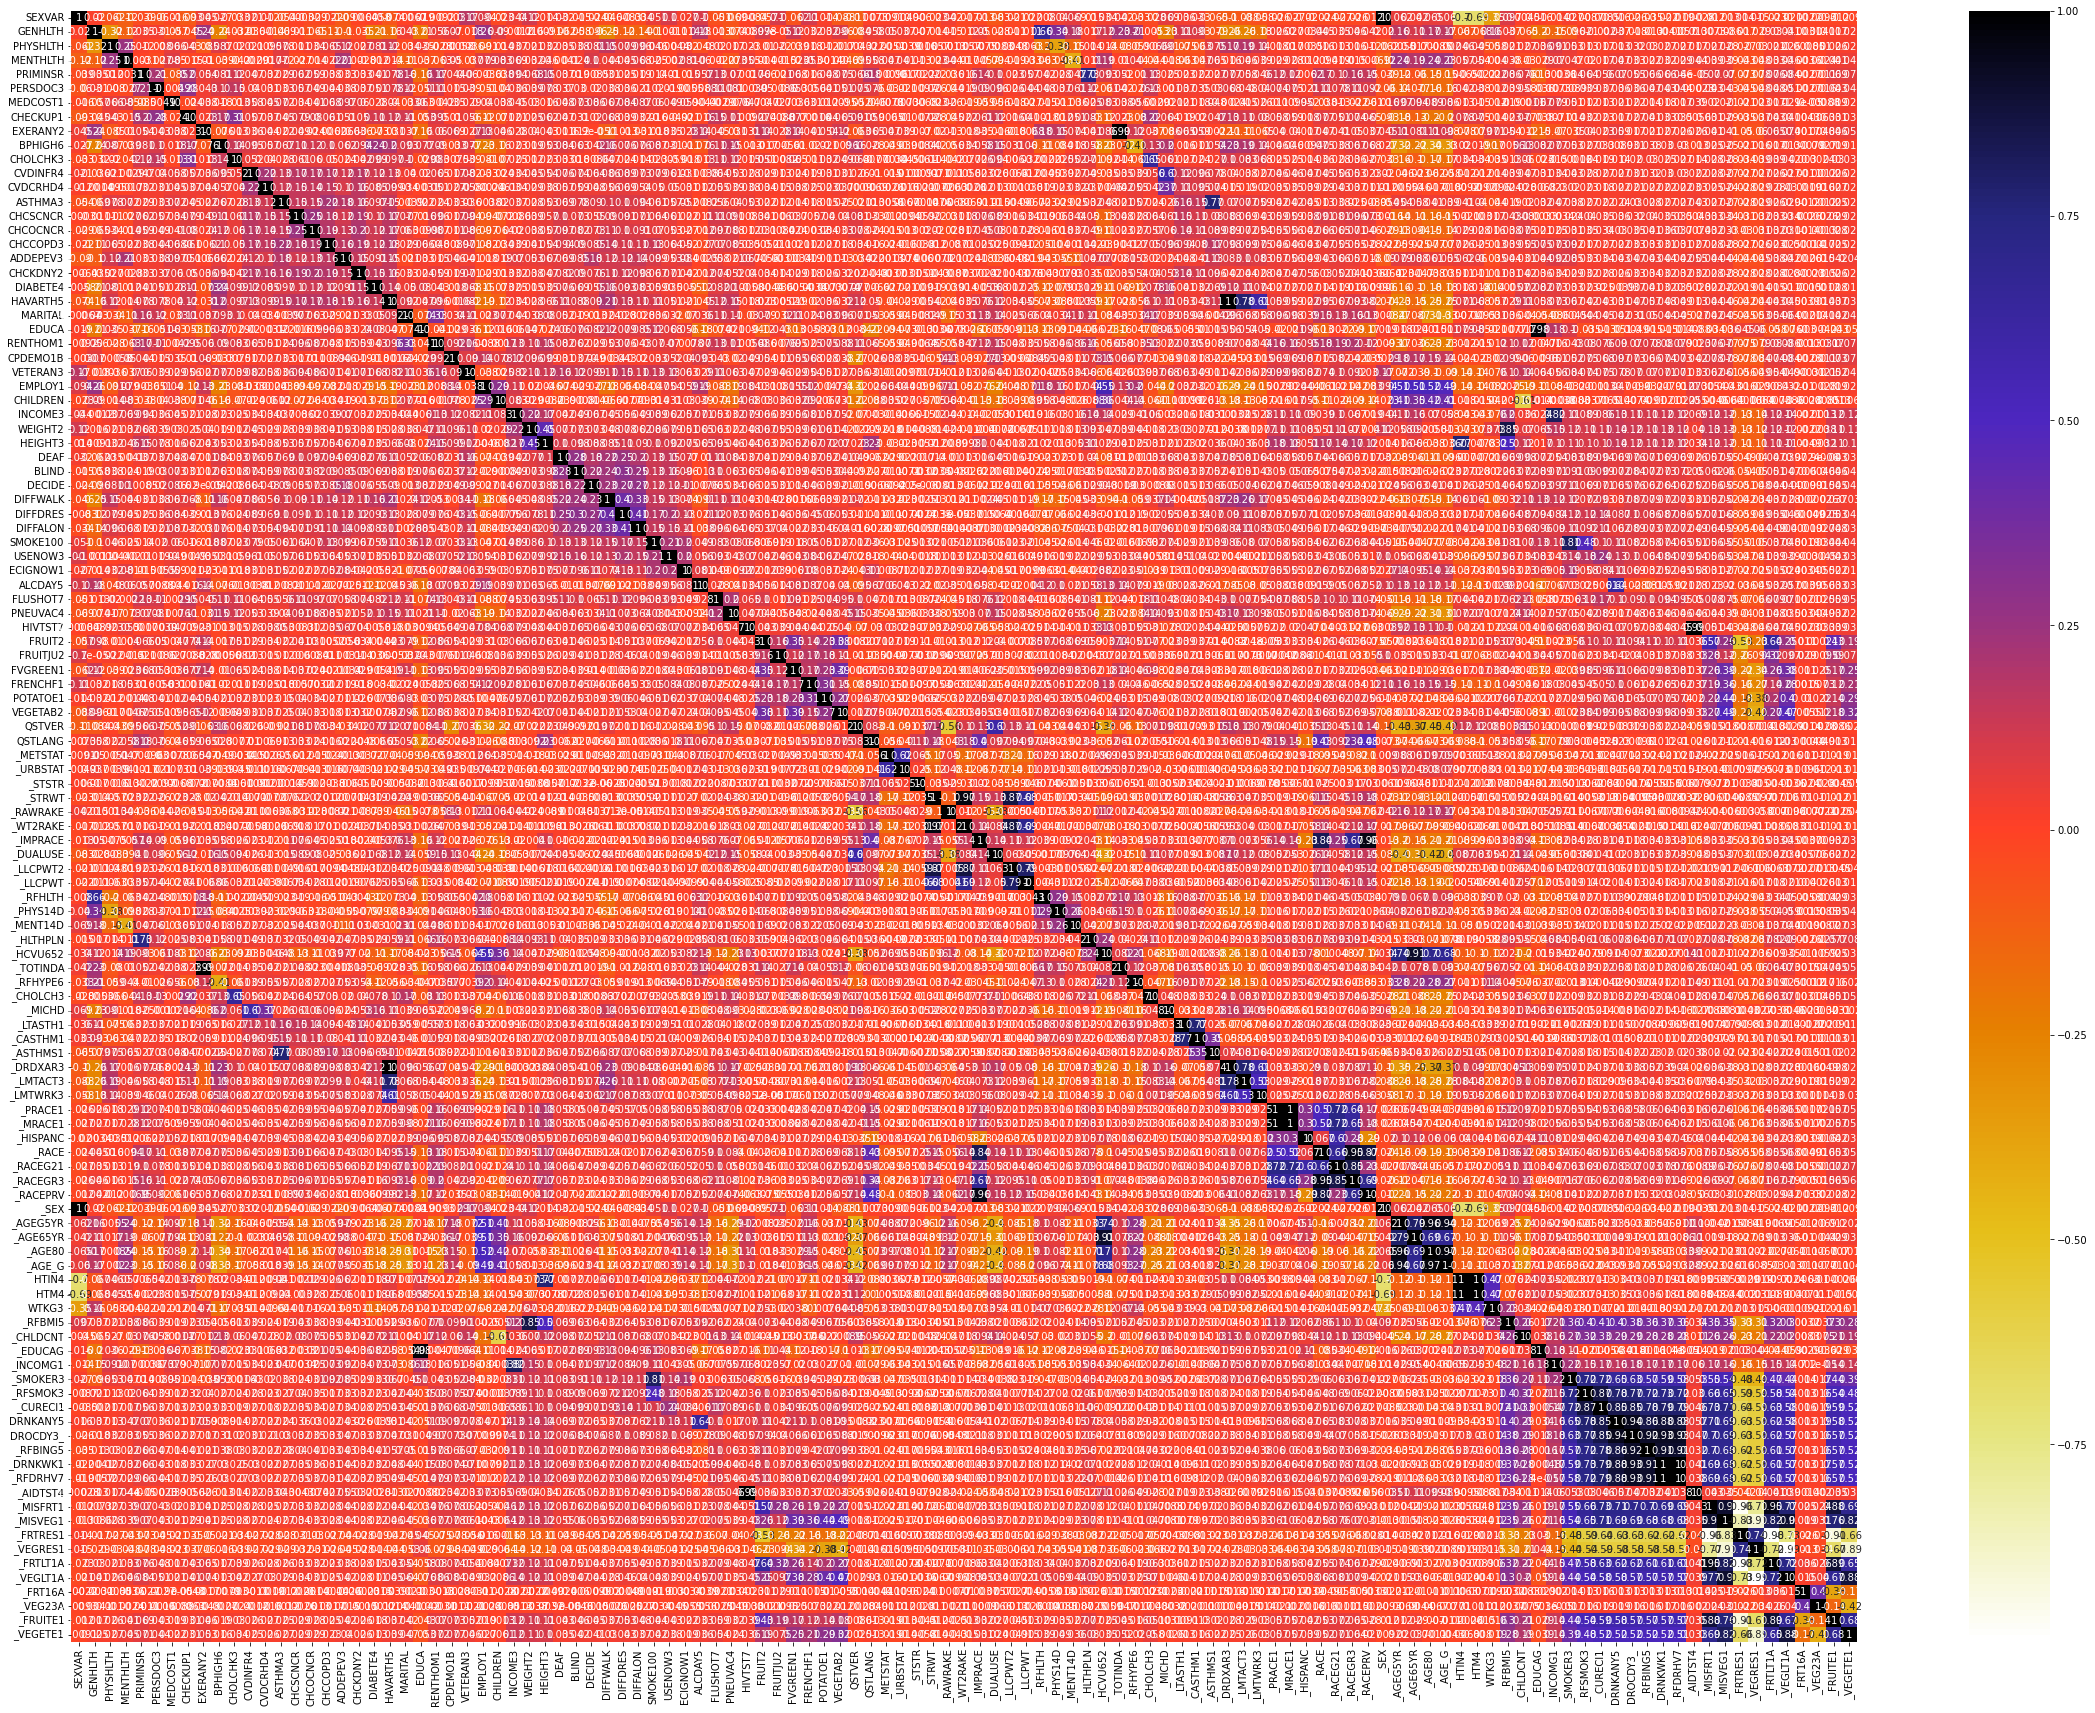

In [30]:
plt.figure(figsize=(40,30))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show();

In [26]:
column_headers = list(df_2.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'CHOLCHK3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'ALCDAY5', 'FLUSHOT7', 'PNEUVAC4', 'HIVTST7', 'FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_

## Univariate logistics regressin to find out association

In [22]:
model = sm.GLM.from_formula("CVDSTRK3 ~ SEXVAR", family=sm.families.Binomial(), data=df_2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CVDSTRK3   No. Observations:               438691
Model:                            GLM   Df Residuals:                   438689
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Fri, 14 Apr 2023   Deviance:                   3.2148e+07
Time:                        12:47:19   Pearson chi2:                 2.16e+21
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.429e+15   3.28e+05   1.35e+10      0.000    4.43e+15    4.43e+15
SEXVAR     -1.457e+13   2.03e+05  -7.17e+07      0.000   -1.46e+13   -1.46e+13
==============================================================================
"""

In [25]:
#df_2 = df_2[df_2['CVDSTRK3']<3]
model = sm.GLM.from_formula("CVDSTRK3 ~ GENHLTH", family=sm.families.Binomial(), data=df_2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CVDSTRK3   No. Observations:               437261
Model:                            GLM   Df Residuals:                   437259
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Fri, 14 Apr 2023   Deviance:                   3.1445e+07
Time:                        12:52:49   Pearson chi2:                 1.89e+21
No. Iterations:                     5   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.122e+16   2.58e+05   8.22e+10      0.000    2.12e+16    2.12e+16
GENHLTH    -1.803e+15   9.41e+04  -1.92e+10      0.000    -1.8e+15    -1.8e+15
==============================================================================
"""

In [27]:
model = sm.GLM.from_formula("CVDSTRK3 ~ SEXVAR + GENHLTH", family=sm.families.Binomial(), data=df_2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CVDSTRK3   No. Observations:               437261
Model:                            GLM   Df Residuals:                   437258
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Fri, 14 Apr 2023   Deviance:                   3.1445e+07
Time:                        12:54:33   Pearson chi2:                 1.89e+21
No. Iterations:                     5   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.122e+16   4.02e+05   5.28e+10      0.000    2.12e+16    2.12e+16
SEXVAR     -1.619e+12   2.04e+05  -7.96e+06      0.000   -1.62e+12   -1.62e+12
GENHLTH    -1.803e+15   9.41e+04  -1.92e+10      0.000    -1.8e+15    -1.8e+15
==============================================================================
"""

In [26]:
model = sm.GLM.from_formula("CVDSTRK3 ~ PHYSHLTH", family=sm.families.Binomial(), data=df_2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CVDSTRK3   No. Observations:               437262
Model:                            GLM   Df Residuals:                   437260
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Fri, 14 Apr 2023   Deviance:                   3.1445e+07
Time:                        12:53:33   Pearson chi2:                 1.89e+21
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.219e+15   2.04e+05   2.07e+10      0.000    4.22e+15    4.22e+15
PHYSHLTH    1.699e+12   2802.139   6.06e+08      0.000     1.7e+12     1.7e+12
==============================================================================
"""

In [28]:
model = sm.GLM.from_formula("CVDSTRK3 ~ SEXVAR + PHYSHLTH", family=sm.families.Binomial(), data=df_2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CVDSTRK3   No. Observations:               437262
Model:                            GLM   Df Residuals:                   437259
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Fri, 14 Apr 2023   Deviance:                   3.1445e+07
Time:                        12:55:21   Pearson chi2:                 1.89e+21
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.213e+15   3.83e+05    1.1e+10      0.000    4.21e+15    4.21e+15
SEXVAR      3.516e+12   2.04e+05   1.72e+07      0.000    3.52e+12    3.52e+12
PHYSHLTH    1.702e+12   2807.252   6.06e+08      0.000     1.7e+12     1.7e+12
==============================================================================
"""

In [29]:
model = sm.GLM.from_formula("CVDSTRK3 ~ GENHLTH + PHYSHLTH", family=sm.families.Binomial(), data=df_2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CVDSTRK3   No. Observations:               437259
Model:                            GLM   Df Residuals:                   437256
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Fri, 14 Apr 2023   Deviance:                   3.1445e+07
Time:                        12:56:18   Pearson chi2:                 1.89e+21
No. Iterations:                     5   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.09e+16    3.7e+05   5.64e+10      0.000    2.09e+16    2.09e+16
GENHLTH    -1.745e+15   9.91e+04  -1.76e+10      0.000   -1.75e+15   -1.75e+15
PHYSHLTH    2.917e+12   2953.230   9.88e+08      0.000    2.92e+12    2.92e+12
==============================================================================
"""

In [30]:
model = sm.GLM.from_formula("CVDSTRK3 ~ SEXVAR + GENHLTH + PHYSHLTH", family=sm.families.Binomial(), data=df_2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CVDSTRK3   No. Observations:               437259
Model:                            GLM   Df Residuals:                   437255
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Fri, 14 Apr 2023   Deviance:                   3.1445e+07
Time:                        12:56:59   Pearson chi2:                 1.89e+21
No. Iterations:                     5   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.092e+16   4.92e+05   4.25e+10      0.000    2.09e+16    2.09e+16
SEXVAR      1.879e+13   2.04e+05   9.22e+07      0.000    1.88e+13    1.88e+13
GENHLTH     -1.76e+15   9.91e+04  -1.78e+10      0.000   -1.76e+15   -1.76e+15
PHYSHLTH    2.691e+12   2958.084    9.1e+08      0.000    2.69e+12    2.69e+12
==============================================================================
"""

## Multivariate logistic regression to find out insignificant variables

In [28]:
model = sm.GLM.from_formula("CVDSTRK3 ~ _STATE + FMONTH + IDATE + IMONTH + IDAY + IYEAR + DISPCODE + SEQNO + _PSU + SEXVAR+ GENHLTH+ PHYSHLTH+ MENTHLTH+ PRIMINSR+ PERSDOC3+ MEDCOST1+ CHECKUP1+ EXERANY2+ BPHIGH6+ CHOLCHK3+ CVDINFR4+ CVDCRHD4+ CVDSTRK3+ ASTHMA3+ CHCSCNCR+ CHCOCNCR+ CHCCOPD3+ ADDEPEV3+ CHCKDNY2+ DIABETE4+ HAVARTH5+ MARITAL+ EDUCA+ RENTHOM1+ CPDEMO1B+ VETERAN3+ EMPLOY1+ CHILDREN+ INCOME3+ WEIGHT2+ HEIGHT3+ DEAF+ BLIND+ DECIDE+ DIFFWALK+ DIFFDRES+ DIFFALON+ SMOKE100+ USENOW3+ ECIGNOW1+ ALCDAY5+ FLUSHOT7+ PNEUVAC4+ HIVTST7+ FRUIT2+ FRUITJU2+ FVGREEN1+ FRENCHF1+ POTATOE1+ VEGETAB2+ QSTVER+ QSTLANG+ _METSTAT+ _URBSTAT+ _STSTR+ _STRWT+ _RAWRAKE+ _WT2RAKE+ _IMPRACE+ _DUALUSE+ _LLCPWT2+ _LLCPWT+ _RFHLTH+ _PHYS14D+ _MENT14D+ _HLTHPLN+ _HCVU652+ _TOTINDA+ _RFHYPE6+ _CHOLCH3+ _MICHD+ _LTASTH1+ _CASTHM1+ _ASTHMS1+ _DRDXAR3+ _LMTACT3+ _LMTWRK3+ _PRACE1+ _MRACE1+ _HISPANC+ _RACE+ _RACEG21+ _RACEGR3+ _RACEPRV+ _SEX+ _AGEG5YR+ _AGE65YR+ _AGE80+ _AGE_G+ HTIN4+ HTM4+ WTKG3+ _RFBMI5+ _CHLDCNT+ _EDUCAG+ _INCOMG1+ _SMOKER3+ _RFSMOK3+ _CURECI1+ DRNKANY5+ DROCDY3_+ _RFBING5+ _DRNKWK1+ _RFDRHV7+ _AIDTST4+ _MISFRT1+ _MISVEG1+ _FRTRES1+ _VEGRES1+ _FRTLT1A+ _VEGLT1A+ _FRT16A+ _VEG23A+ _FRUITE1+ _VEGETE1", family=sm.families.Binomial(), data=df_1)
result = model.fit()
result.summary() 

MemoryError: Unable to allocate 105. GiB for an array with shape (356654, 39676) and data type float64

In [24]:
model = sm.GLM.from_formula("CVDSTRK3 ~ SEXVAR+ GENHLTH+ PHYSHLTH+ MENTHLTH+ PRIMINSR+ PERSDOC3+ MEDCOST1+ CHECKUP1+ EXERANY2+ BPHIGH6+ CHOLCHK3+ CVDINFR4+ CVDCRHD4+ CVDSTRK3+ ASTHMA3+ CHCSCNCR+ CHCOCNCR+ CHCCOPD3+ ADDEPEV3+ CHCKDNY2+ DIABETE4+ HAVARTH5+ MARITAL+ EDUCA+ RENTHOM1+ CPDEMO1B+ VETERAN3+ EMPLOY1+ CHILDREN+ INCOME3+ WEIGHT2+ HEIGHT3+ DEAF+ BLIND+ DECIDE+ DIFFWALK+ DIFFDRES+ DIFFALON+ SMOKE100+ USENOW3+ ECIGNOW1+ ALCDAY5+ FLUSHOT7+ PNEUVAC4+ HIVTST7+ FRUIT2+ FRUITJU2+ FVGREEN1+ FRENCHF1+ POTATOE1+ VEGETAB2+ QSTVER+ QSTLANG+ _METSTAT+ _URBSTAT+ _STSTR+ _STRWT+ _RAWRAKE+ _WT2RAKE+ _IMPRACE+ _DUALUSE+ _LLCPWT2+ _LLCPWT+ _RFHLTH+ _PHYS14D+ _MENT14D+ _HLTHPLN+ _HCVU652+ _TOTINDA+ _RFHYPE6+ _CHOLCH3+ _MICHD+ _LTASTH1+ _CASTHM1+ _ASTHMS1+ _DRDXAR3+ _LMTACT3+ _LMTWRK3+ _PRACE1+ _MRACE1+ _HISPANC+ _RACE+ _RACEG21+ _RACEGR3+ _RACEPRV+ _SEX+ _AGEG5YR+ _AGE65YR+ _AGE80+ _AGE_G+ HTIN4+ HTM4+ WTKG3+ _RFBMI5+ _CHLDCNT+ _EDUCAG+ _INCOMG1+ _SMOKER3+ _RFSMOK3+ _CURECI1+ DRNKANY5+ DROCDY3_+ _RFBING5+ _DRNKWK1+ _RFDRHV7+ _AIDTST4+ _MISFRT1+ _MISVEG1+ _FRTRES1+ _VEGRES1+ _FRTLT1A+ _VEGLT1A+ _FRT16A+ _VEG23A+ _FRUITE1+ _VEGETE1", family=sm.families.Binomial(), data=df_2)
result = model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CVDSTRK3   No. Observations:               355892
Model:                            GLM   Df Residuals:                   355778
Model Family:                Binomial   Df Model:                          113
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Fri, 14 Apr 2023   Deviance:                   2.5578e+07
Time:                        12:48:58   Pearson chi2:                 1.54e+21
No. Iterations:                     4   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.688e+15   1.45e+06  -2.55e+09      0.000   -3.69e+15   -3.69e+15
SEXVAR      4.324e+12   3.44e+06   1.26e+06      0.000    4.32e+12    4.32e+12
GENHLTH     1.704e+13   1.63e+05   1.04e+08      0.000     1.7e+13     1.7e+13
PHYSHLTH    2.803e+11   3588.430   7.81e+07      0.000     2.8e+11     2.8e+11
MENTHLTH   -4.653e+10   3605.284  -1.29e+07      0.000   -4.65e+10   -4.65e+10
PRIMINSR   -5.081e+11   7596.624  -6.69e+07      0.000   -5.08e+11   -5.08e+11
PERSDOC3    5.604e+12   1.42e+05   3.94e+07      0.000     5.6e+12     5.6e+12
MEDCOST1    5.322e+12   3.18e+05   1.68e+07      0.000    5.32e+12    5.32e+12
CHECKUP1   -1.241e+13   1.18e+05  -1.05e+08      0.000   -1.24e+13   -1.24e+13
EXERANY2   -6.436e+13   1.92e+06  -3.35e+07      0.000   -6.44e+13   -6.44e+13
BPHIGH6     6.227e+12   1.42e+05    4.4e+07      0.000    6.23e+12    6.23e+12
CHOLCHK3    6.803e+12   8.92e+04   7.63e+07      0.000     6.8e+12     6.8e+12
CVDINFR4   -7.018e+12   5.49e+05  -1.28e+07      0.000   -7.02e+12   -7.02e+12
CVDCRHD4    4.376e+13   3.57e+05   1.22e+08      0.000    4.38e+13    4.38e+13
CVDSTRK3    1.552e+16   5.97e+05    2.6e+10      0.000    1.55e+16    1.55e+16
ASTHMA3    -1.009e+12   5.26e+05  -1.92e+06      0.000   -1.01e+12   -1.01e+12
CHCSCNCR   -4.501e+11   2.98e+05  -1.51e+06      0.000    -4.5e+11    -4.5e+11
CHCOCNCR     2.76e+12      3e+05    9.2e+06      0.000    2.76e+12    2.76e+12
CHCCOPD3    1.104e+13    2.9e+05   3.81e+07      0.000     1.1e+13     1.1e+13
ADDEPEV3   -7.288e+12   2.21e+05   -3.3e+07      0.000   -7.29e+12   -7.29e+12
CHCKDNY2    1.055e+13   3.34e+05   3.16e+07      0.000    1.06e+13    1.06e+13
DIABETE4    1.658e+12   1.68e+05   9.86e+06      0.000    1.66e+12    1.66e+12
HAVARTH5    -6.73e+12   2.17e+05   -3.1e+07      0.000   -6.73e+12   -6.73e+12
MARITAL     1.714e+12   7.77e+04   2.21e+07      0.000    1.71e+12    1.71e+12
EDUCA      -7.144e+13   7.42e+05  -9.63e+07      0.000   -7.14e+13   -7.14e+13
RENTHOM1   -6.232e+12   1.66e+05  -3.75e+07      0.000   -6.23e+12   -6.23e+12
CPDEMO1B   -1.056e+11   8.93e+04  -1.18e+06      0.000   -1.06e+11   -1.06e+11
VETERAN3    1.834e+12   2.81e+05   6.52e+06      0.000    1.83e+12    1.83e+12
EMPLOY1     3.345e+12   5.34e+04   6.27e+07      0.000    3.34e+12    3.34e+12
CHILDREN    2.764e+11   4469.914   6.18e+07      0.000    2.76e+11    2.76e+11
INCOME3    -1.264e+11   7102.953  -1.78e+07      0.000   -1.26e+11   -1.26e+11
WEIGHT2    -1.561e+10    323.423  -4.83e+07      0.000   -1.56e+10   -1.56e+10
HEIGHT3      2.22e+11   4602.638   4.82e+07      0.000    2.22e+11    2.22e+11
DEAF        -5.02e+12   2.86e+05  -1.76e+07      0.000   -5.02e+12   -5.02e+12
BLIND       1.385e+13   3.38e+05    4.1e+07      0.000    1.39e+13    1.39e+13
DECIDE      1.283e+13   2.28e+05   5.64e+07      0.000    1.28e+13    1.28e+13
DI

### As we can see above for all 115 dependent variables are significant for the independent variable as p-value is less thn 0.05.

## Imputation Using K-NN

In [20]:
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000)

ModuleNotFoundError: No module named 'impyute'

In [19]:
analyze_report = sv.analyze(df_1)
#analyze_report.show_html('report.html', open_browser=False)
analyze_report.show_pdf('report.pdf')

                                             |                                             | [  0%]   00:00 ->…

AttributeError: 'DataframeReport' object has no attribute 'show_pdf'

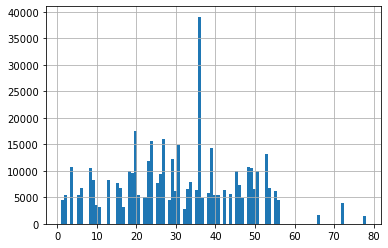

In [19]:
df_1['_STATE'].hist(bins=100);

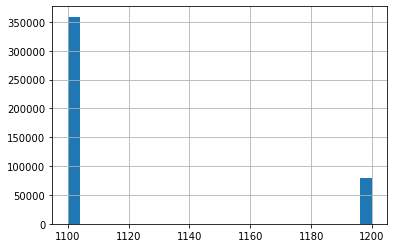

In [20]:
df_1['DISPCODE'].hist(bins=25);

In [32]:
#df_1.plot.scatter(x='_STATE', y='LADULT1');

In [26]:
df_1.corr()

_STATE    FMONTH  DISPCODE      _PSU    SEXVAR   GENHLTH  \
_STATE    1.000000  0.026577 -0.011857  0.046600  0.005931  0.007213   
FMONTH    0.026577  1.000000  0.018638  0.208796 -0.002044  0.004223   
DISPCODE -0.011857  0.018638  1.000000  0.033129 -0.029264 -0.018659   
_PSU      0.046600  0.208796  0.033129  1.000000 -0.045330 -0.033579   
SEXVAR    0.005931 -0.002044 -0.029264 -0.045330  1.000000  0.018982   
...            ...       ...       ...       ...       ...       ...   
_VEGLT1A -0.003860  0.022030  0.552329  0.029463 -0.021747  0.042201   
_FRT16A   0.002083 -0.009332  0.007567 -0.045737 -0.001279 -0.001349   
_VEG23A   0.002326 -0.009583  0.010592 -0.055727 -0.008539  0.004524   
_FRUITE1 -0.004916  0.021613  0.491388  0.045459 -0.012480  0.016527   
_VEGETE1 -0.006059  0.023446  0.500888  0.051705 -0.009984  0.025147   

          PHYSHLTH  MENTHLTH  PRIMINSR  PERSDOC3  ...  _MISFRT1  _MISVEG1  \
_STATE   -0.001550  0.012473  0.002225 -0.011752  ... -0.007610 -0.010692   
FMONTH   -0.036604 -0.002223  0.005250  0.022317  ...  0.018985  0.019775   
DISPCODE  0.019870  0.005843  0.061685  0.050631  ...  0.588719  0.639980   
_PSU     -0.001962 -0.028644  0.031266  0.034567  ...  0.033152  0.036139   
SEXVAR   -0.060230 -0.114508 -0.039955 -0.060975  ... -0.012389 -0.013290   
...            ...       ...       ...       ...  ...       ...       ...   
_VEGLT1A  0.025249  0.045533  0.081545  0.050757  ...  0.767838  0.903967   
_FRT16A  -0.001412 -0.003893 -0.002801 -0.003713  ...  0.024905  0.018756   
_VEG23A  -0.000405 -0.002447 -0.000687 -0.002607  ...  0.024347  0.031175   
_FRUITE1  0.025961  0.041498  0.066970  0.042946  ...  0.880817  0.761575   
_VEGETE1  0.026550  0.044587  0.069120  0.044658  ...  0.692106  0.814735   

          _FRTRES1  _VEGRES1  _FRTLT1A  _VEGLT1A   _FRT16A   _VEG23A  \
_STATE    0.004402  0.005516 -0.004650 -0.003860  0.002083  0.002326   
FMONTH   -0.019279 -0.021059  0.021416  0.022030 -0.009332 -0.009583   
DISPCODE -0.535287 -0.556512  0.526683  0.552329  0.007567  0.010592   
_PSU     -0.029031 -0.029316  0.030229  0.029463 -0.045737 -0.055727   
SEXVAR    0.014074  0.015216 -0.024082 -0.021747 -0.001279 -0.008539   
...            ...       ...       ...       ...       ...       ...   
_VEGLT1A -0.728877 -0.991066  0.721476  1.000000  0.014100  0.039764   
_FRT16A  -0.025821 -0.011954  0.036358  0.014100  1.000000  0.398371   
_VEG23A  -0.021536 -0.034179  0.025882  0.039764  0.398371  1.000000   
_FRUITE1 -0.913228 -0.673000  0.893178  0.667555 -0.383734 -0.142477   
_VEGETE1 -0.657074 -0.893235  0.643521  0.882605 -0.168346 -0.418797   

          _FRUITE1  _VEGETE1  
_STATE   -0.004916 -0.006059  
FMONTH    0.021613  0.023446  
DISPCODE  0.491388  0.500888  
_PSU      0.045459  0.051705  
SEXVAR   -0.012480 -0.009984  
...            ...       ...  
_VEGLT1A  0.667555  0.882605  
_FRT16A  -0.383734 -0.168346  
_VEG23A  -0.142477 -0.418797  
_FRUITE1  1.000000  0.675588  
_VEGETE1  0.675588  1.000000  

[120 rows x 120 columns]

In [31]:
#sns.heatmap(df_1.corr(), cmap = 'CVDSTRK3')

In [21]:
df['CVDINFR4'].value_counts() #CVDINFR4: ever told you had a heart attack 1=yes, 2=No, 7=Don't know/not sure, 9=Refused

2.0    413207
1.0     22831
7.0      2319
9.0       334
Name: CVDINFR4, dtype: int64

In [25]:
df['CVDCRHD4'].value_counts() #CVDCRHD4: Ever Diagnosed with Angina or Coronary Heart Disease 1=yes, 2=No, 7=Don't know/not sure, 9=Refused

2.0    411527
1.0     22891
7.0      3934
9.0       339
Name: CVDCRHD4, dtype: int64

In [26]:
df['CVDSTRK3'].value_counts() #CVDSTRK3: Ever Diagnosed with a Stroke 1=yes, 2=No, 7=Don't know/not sure, 9=Refused

2.0    420051
1.0     17213
7.0      1130
9.0       297
Name: CVDSTRK3, dtype: int64

In [22]:
# Get probabilities instead of counts
props = df['CVDSTRK3']\
    .value_counts(sort=False,normalize=True)
props

2.0    0.957510
1.0    0.039237
7.0    0.002576
9.0    0.000677
Name: CVDSTRK3, dtype: float64

### Seems like skewd data as 95% had no stroke

In [22]:
# Show missing values
df['CVDSTRK3']\
    .value_counts(sort=True, ascending=True)

9.0       297
7.0      1130
1.0     17213
2.0    420051
Name: CVDSTRK3, dtype: int64

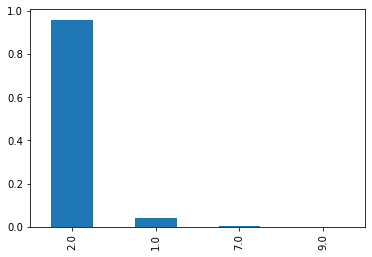

In [24]:
df['CVDSTRK3']\
    .value_counts(sort=False,normalize=True)\
    .plot(kind='bar');

###  Subsetting data set considering CVDSTRK3 as a outcome variables and some risk factors like 
### co-morbodities bloodpressure, cholestrole, asthma, cancer, COPD etc. but more feature engineering required.

In [23]:
df_1 = df[['BPHIGH6','BPMEDS','TOLDHI3','CHOLMED3','ASTHMA3','ASTHNOW','CHCSCNCR','CHCOCNCR','CHCCOPD3','ADDEPEV3','CHCKDNY2','DIABETE4','DIABAGE3','HAVARTH5','CVDSTRK3']]

In [24]:
df_1.head()

BPHIGH6  BPMEDS  TOLDHI3  CHOLMED3  ASTHMA3  ASTHNOW  CHCSCNCR  CHCOCNCR  \
0      3.0     NaN      1.0       1.0      1.0      1.0       2.0       2.0   
1      1.0     1.0      1.0       1.0      2.0      NaN       2.0       2.0   
2      1.0     1.0      2.0       2.0      2.0      NaN       2.0       2.0   
3      1.0     1.0      1.0       2.0      2.0      NaN       2.0       2.0   
4      4.0     NaN      1.0       1.0      2.0      NaN       2.0       2.0   

   CHCCOPD3  ADDEPEV3  CHCKDNY2  DIABETE4  DIABAGE3  HAVARTH5  CVDSTRK3  
0       1.0       2.0       2.0       3.0       NaN       1.0       2.0  
1       2.0       2.0       1.0       1.0      98.0       1.0       2.0  
2       2.0       2.0       2.0       1.0      98.0       2.0       2.0  
3       2.0       2.0       2.0       1.0      56.0       2.0       2.0  
4       2.0       2.0       2.0       1.0      65.0       2.0       1.0

In [25]:
df_1.isnull().sum(0)

BPHIGH6          2
BPMEDS      266560
TOLDHI3      60836
CHOLMED3     61571
ASTHMA3          2
ASTHNOW     377191
CHCSCNCR         2
CHCOCNCR         3
CHCCOPD3         3
ADDEPEV3         3
CHCKDNY2         3
DIABETE4         3
DIABAGE3    381078
HAVARTH5         3
CVDSTRK3         2
dtype: int64

$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$

In [26]:
df_1.shape
df_1.dtypes

(438693, 15)

BPHIGH6     float64
BPMEDS      float64
TOLDHI3     float64
CHOLMED3    float64
ASTHMA3     float64
ASTHNOW     float64
CHCSCNCR    float64
CHCOCNCR    float64
CHCCOPD3    float64
ADDEPEV3    float64
CHCKDNY2    float64
DIABETE4    float64
DIABAGE3    float64
HAVARTH5    float64
CVDSTRK3    float64
dtype: object

In [27]:
df_1.describe()

BPHIGH6         BPMEDS        TOLDHI3       CHOLMED3  \
count  438691.000000  172133.000000  377857.000000  377122.000000   
mean        2.238437       1.187861       1.647766       1.722199   
std         1.053716       0.507136       0.713507       0.616784   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         3.000000       1.000000       2.000000       2.000000   
75%         3.000000       1.000000       2.000000       2.000000   
max         9.000000       9.000000       9.000000       9.000000   

             ASTHMA3       ASTHNOW       CHCSCNCR       CHCOCNCR  \
count  438691.000000  61502.000000  438691.000000  438690.000000   
mean        1.881064      1.454912       1.923999       1.920782   
std         0.491948      1.071412       0.430930       0.435299   
min         1.000000      1.000000       1.000000       1.000000   
25%         2.000000      1.000000       2.000000       2.000000   
50%         2.000000      1.000000       2.000000       2.000000   
75%         2.000000      2.000000       2.000000       2.000000   
max         9.000000      9.000000       9.000000       9.000000   

            CHCCOPD3       ADDEPEV3       CHCKDNY2       DIABETE4  \
count  438690.000000  438690.000000  438690.000000  438690.000000   
mean        1.947505       1.837179       1.983116       2.761946   
std         0.460430       0.591371       0.399326       0.743411   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       2.000000       3.000000   
50%         2.000000       2.000000       2.000000       3.000000   
75%         2.000000       2.000000       2.000000       3.000000   
max         9.000000       9.000000       9.000000       9.000000   

           DIABAGE3       HAVARTH5       CVDSTRK3  
count  57615.000000  438690.000000  438691.000000  
mean      53.508774       1.709886       1.978381  
std       19.366633       0.653967       0.369242  
min        1.000000       1.000000       1.000000  
25%       41.000000       1.000000       2.000000  
50%       52.000000       2.000000       2.000000  
75%       62.000000       2.000000       2.000000  
max       99.000000       9.000000       9.000000

In [40]:
df_1['CVDSTRK3'].value_counts() 

2.0    420051
1.0     17213
Name: CVDSTRK3, dtype: int64

In [51]:
df_2 = df_1[df_1['CVDSTRK3']<3]

In [52]:
df_2['CVDSTRK3'].value_counts() 

2.0    420051
1.0     17213
Name: CVDSTRK3, dtype: int64

In [34]:
df_2.select_dtypes(['float64']).columns

Index(['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3',
       'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6',
       ...
       '_MISFRT1', '_MISVEG1', '_FRTRES1', '_VEGRES1', '_FRTLT1A', '_VEGLT1A',
       '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1'],
      dtype='object', length=116)

In [43]:
df_2.info

<bound method DataFrame.info of         _STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
0          1.0     1.0  b'01192021'  b'01'  b'19'  b'2021'    1100.0   
1          1.0     1.0  b'01212021'  b'01'  b'21'  b'2021'    1100.0   
2          1.0     1.0  b'01212021'  b'01'  b'21'  b'2021'    1100.0   
3          1.0     1.0  b'01172021'  b'01'  b'17'  b'2021'    1100.0   
4          1.0     1.0  b'01152021'  b'01'  b'15'  b'2021'    1100.0   
...        ...     ...          ...    ...    ...      ...       ...   
438688    78.0    12.0  b'01062022'  b'01'  b'06'  b'2022'    1100.0   
438689    78.0    12.0  b'01122022'  b'01'  b'12'  b'2022'    1100.0   
438690    78.0    12.0  b'12212021'  b'12'  b'21'  b'2021'    1100.0   
438691    78.0    12.0  b'01112022'  b'01'  b'11'  b'2022'    1100.0   
438692    78.0    12.0  b'12222021'  b'12'  b'22'  b'2021'    1100.0   

                SEQNO          _PSU  SEXVAR  ...      _MISFRT1      _MISVEG1  \
0       b'2021000001'  

In [44]:
df_2.isnull().sum(0)

_STATE      0
FMONTH      0
IDATE       0
IMONTH      0
IDAY        0
           ..
_VEGLT1A    0
_FRT16A     0
_VEG23A     0
_FRUITE1    0
_VEGETE1    0
Length: 125, dtype: int64

In [35]:
df_2[['BPHIGH6','CHOLMED3','ASTHMA3','ASTHNOW','CHCSCNCR','CHCOCNCR','CHCCOPD3','ADDEPEV3','CHCKDNY2','DIABETE4','HAVARTH5','CVDSTRK3']] = df_2[['BPHIGH6','BPMEDS','TOLDHI3','CHOLMED3','ASTHMA3','ASTHNOW','CHCSCNCR','CHCOCNCR','CHCCOPD3','ADDEPEV3','CHCKDNY2','DIABETE4','HAVARTH5','CVDSTRK3']].astype("category")

In [22]:
df_2.shape
df_3 = df_2.dropna()#dropping all the rows containing any null values
df_3.shape

(438693, 116)

(356654, 116)

In [68]:
#df_3[['BPHIGH6','ASTHMA3','CHCSCNCR','CHCOCNCR','CHCCOPD3','ADDEPEV3','CHCKDNY2','DIABETE4','HAVARTH5','CVDSTRK3']] = df_3[['BPHIGH6','ASTHMA3','CHCSCNCR','CHCOCNCR','CHCCOPD3','ADDEPEV3','CHCKDNY2','DIABETE4','HAVARTH5','CVDSTRK3']].astype("category")
datatypes = df_3.dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(datatypes)

SEXVAR       float64
GENHLTH      float64
PHYSHLTH     float64
MENTHLTH     float64
PRIMINSR     float64
PERSDOC3     float64
MEDCOST1     float64
CHECKUP1     float64
EXERANY2     float64
BPHIGH6     category
CHOLCHK3     float64
CVDINFR4     float64
CVDCRHD4     float64
CVDSTRK3    category
ASTHMA3     category
CHCSCNCR    category
CHCOCNCR    category
CHCCOPD3    category
ADDEPEV3    category
CHCKDNY2    category
DIABETE4    category
HAVARTH5    category
MARITAL      float64
EDUCA        float64
RENTHOM1     float64
CPDEMO1B     float64
VETERAN3     float64
EMPLOY1      float64
CHILDREN     float64
INCOME3      float64
WEIGHT2      float64
HEIGHT3      float64
DEAF         float64
BLIND        float64
DECIDE       float64
DIFFWALK     float64
DIFFDRES     float64
DIFFALON     float64
SMOKE100     float64
USENOW3      float64
ECIGNOW1     float64
ALCDAY5      float64
FLUSHOT7     float64
PNEUVAC4     float64
HIVTST7      float64
FRUIT2       float64
FRUITJU2     float64
FVGREEN1     

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(df_3['_LLCPWT'].value_counts())
    print(df_3['ALCDAY5'].value_counts())


888.0    165933
201.0     27796
202.0     21776
101.0     15503
230.0     13795
203.0     12632
102.0     11544
205.0     10487
204.0     10444
210.0      8570
103.0      8048
215.0      6755
220.0      6724
107.0      6101
206.0      3805
104.0      3779
105.0      3599
208.0      3197
225.0      2881
207.0      2768
777.0      2744
212.0      1797
106.0      1178
999.0      1094
228.0       862
214.0       534
229.0       343
209.0       257
227.0       225
224.0       225
216.0       223
218.0       217
221.0       215
222.0       166
226.0       146
217.0        88
213.0        78
223.0        69
211.0        42
219.0        14
Name: ALCDAY5, dtype: int64


In [57]:
column_headers = list(df_3.columns.values)
print(column_headers)

['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'CHOLCHK3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'ALCDAY5', 'FLUSHOT7', 'PNEUVAC4', 'HIVTST7', 'FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX', '_AGEG5YR', '_

In [58]:
# 'WEIGHT2', 'HEIGHT3','CHILDREN' , 'ALCDAY5',, 'FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', '_STSTR', '_STRWT', '_WT2RAKE', '_LLCPWT2', 'HTIN4', 'HTM4', 'WTKG3', 'DROCDY3_', '_DRNKWK1'removed and CVDSTRK3 sent to last
column_headers_1 = ['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'CHOLCHK3', 'CVDINFR4', 'CVDCRHD4', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'INCOME3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'FLUSHOT7', 'PNEUVAC4', 'HIVTST7', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', '_RAWRAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG1', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7', '_AIDTST4', '_MISFRT1', '_MISVEG1', '_FRTRES1', '_VEGRES1', '_FRTLT1A', '_VEGLT1A', '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1', 'CVDSTRK3']

In [59]:
df_3[column_headers_1] = df_3[column_headers_1].astype("category")
datatypes = df_3.dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(datatypes)

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_1536\2093525961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[column_headers_1] = df_3[column_headers_1].astype("category")


SEXVAR      category
GENHLTH     category
PHYSHLTH    category
MENTHLTH    category
PRIMINSR    category
PERSDOC3    category
MEDCOST1    category
CHECKUP1    category
EXERANY2    category
BPHIGH6     category
CHOLCHK3    category
CVDINFR4    category
CVDCRHD4    category
CVDSTRK3    category
ASTHMA3     category
CHCSCNCR    category
CHCOCNCR    category
CHCCOPD3    category
ADDEPEV3    category
CHCKDNY2    category
DIABETE4    category
HAVARTH5    category
MARITAL     category
EDUCA       category
RENTHOM1    category
CPDEMO1B    category
VETERAN3    category
EMPLOY1     category
CHILDREN     float64
INCOME3     category
WEIGHT2      float64
HEIGHT3      float64
DEAF        category
BLIND       category
DECIDE      category
DIFFWALK    category
DIFFDRES    category
DIFFALON    category
SMOKE100    category
USENOW3     category
ECIGNOW1    category
ALCDAY5      float64
FLUSHOT7    category
PNEUVAC4    category
HIVTST7     category
FRUIT2       float64
FRUITJU2     float64
FVGREEN1     

In [61]:
df_4 = df_3[['CVDSTRK3','SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'CHOLCHK3', 'CVDINFR4', 'CVDCRHD4', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'ALCDAY5', 'FLUSHOT7', 'PNEUVAC4', 'HIVTST7', 'FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'HTIN4', 'HTM4', 'WTKG3', '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG1', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_DRNKWK1', '_RFDRHV7', '_AIDTST4', '_MISFRT1', '_MISVEG1', '_FRTRES1', '_VEGRES1', '_FRTLT1A', '_VEGLT1A', '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1']]

In [62]:
column_headers = list(df_4.columns.values)
print(column_headers)

['CVDSTRK3', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'CHOLCHK3', 'CVDINFR4', 'CVDCRHD4', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'ALCDAY5', 'FLUSHOT7', 'PNEUVAC4', 'HIVTST7', 'FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX', '_AGEG5YR', '_

In [64]:
#One hot encoding using Pandas
df_5 = pd.get_dummies(df_4, columns = column_headers_1)
df_5.shape

MemoryError: Unable to allocate 44.4 GiB for an array with shape (218466, 218466) and data type uint8

In [65]:
#One hot encoding using SKLearn
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
#One hot encoding using SKlearn
enc_data=pd.DataFrame(enc.fit_transform(df_4[column_headers_1]).toarray())
#Merge with main
ohe_data1=data.join(enc_data)

MemoryError: Unable to allocate 582. GiB for an array with shape (356654, 219033) and data type float64

In [37]:
df_2 = df_2.drop(['BPMEDS','TOLDHI3','CHOLMED3','ASTHNOW','DIABAGE3'], axis=1)

In [37]:
df_2.isnull().sum(0)

SEXVAR      0
GENHLTH     3
PHYSHLTH    2
MENTHLTH    0
PRIMINSR    1
           ..
_VEGLT1A    0
_FRT16A     0
_VEG23A     0
_FRUITE1    0
_VEGETE1    0
Length: 116, dtype: int64

In [62]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_3.head())


   SEXVAR  GENHLTH  PHYSHLTH  MENTHLTH  PRIMINSR  PERSDOC3  MEDCOST1  \
0     2.0      5.0      20.0      10.0       3.0       1.0       2.0   
2     2.0      2.0      88.0      88.0       2.0       2.0       2.0   
3     2.0      2.0      88.0      10.0       2.0       1.0       2.0   
4     1.0      5.0      30.0      88.0       3.0       1.0       2.0   
5     1.0      3.0      88.0      88.0       3.0       1.0       2.0   

   CHECKUP1  EXERANY2  BPHIGH6  CHOLCHK3  CVDINFR4  CVDCRHD4  CVDSTRK3  \
0       2.0       2.0      3.0       2.0       2.0       2.0       2.0   
2       1.0       2.0      1.0       2.0       2.0       1.0       2.0   
3       1.0       1.0      1.0       2.0       2.0       2.0       2.0   
4       1.0       1.0      4.0       2.0       1.0       7.0       1.0   
5       1.0       2.0      3.0       2.0       2.0       2.0       2.0   

   ASTHMA3  CHCSCNCR  CHCOCNCR  CHCCOPD3  ADDEPEV3  CHCKDNY2  DIABETE4  \
0      1.0       2.0       2.0       1.0       2

In [39]:
df_2.shape
df_2 = df_2.dropna()
df_2.shape

(355892, 116)

In [29]:
#sns.heatmap(df_1.corr(), cmap = 'CVDSTRK3')

## Normilazation of DIABAGE3 variable and one hot encoding

In [30]:
#df_2['DIABAGE3_n'] = (df_2['DIABAGE3'] - df_2['DIABAGE3'].mean())/df_2['DIABAGE3'].std()

In [59]:
#df_2.describe()

DIABAGE3    DIABAGE3_n
count  57352.000000  5.735200e+04
mean      53.492572 -5.892049e-16
std       19.339456  1.000000e+00
min        1.000000 -2.714273e+00
25%       41.000000 -6.459630e-01
50%       52.000000 -7.717757e-02
75%       62.000000  4.399001e-01
max       99.000000  2.353087e+00

In [60]:
#df_2 = df_2.drop('DIABAGE3', axis=1)

In [ ]:
data = pd.get_dummies(df_2, columns = ['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'CHOLCHK3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'HAVARTH5', 'MARITAL', 'EDUCA', 'RENTHOM1', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ECIGNOW1', 'ALCDAY5', 'FLUSHOT7', 'PNEUVAC4', 'HIVTST7', 'FRUIT2', 'FRUITJU2', 'FVGREEN1', 'FRENCHF1', 'POTATOE1', 'VEGETAB2', 'QSTVER', 'QSTLANG', '_METSTAT', '_URBSTAT', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_DUALUSE', '_LLCPWT2', '_LLCPWT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_MICHD', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_SEX', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'HTIN4', 'HTM4', 'WTKG3', '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG1', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_DRNKWK1', '_RFDRHV7', '_AIDTST4', '_MISFRT1', '_MISVEG1', '_FRTRES1', '_VEGRES1', '_FRTLT1A', '_VEGLT1A', '_FRT16A', '_VEG23A', '_FRUITE1', '_VEGETE1'])
data.shape

In [42]:
data = pd.get_dummies(df_2, columns = ['BPHIGH6','ASTHMA3','CHCSCNCR','CHCOCNCR','CHCCOPD3','ADDEPEV3','CHCKDNY2','DIABETE4','HAVARTH5'])
data.shape

(437263, 41)

In [43]:
data.columns

Index(['CVDSTRK3', 'BPHIGH6_1.0', 'BPHIGH6_2.0', 'BPHIGH6_3.0', 'BPHIGH6_4.0',
       'BPHIGH6_7.0', 'BPHIGH6_9.0', 'ASTHMA3_1.0', 'ASTHMA3_2.0',
       'ASTHMA3_7.0', 'ASTHMA3_9.0', 'CHCSCNCR_1.0', 'CHCSCNCR_2.0',
       'CHCSCNCR_7.0', 'CHCSCNCR_9.0', 'CHCOCNCR_1.0', 'CHCOCNCR_2.0',
       'CHCOCNCR_7.0', 'CHCOCNCR_9.0', 'CHCCOPD3_1.0', 'CHCCOPD3_2.0',
       'CHCCOPD3_7.0', 'CHCCOPD3_9.0', 'ADDEPEV3_1.0', 'ADDEPEV3_2.0',
       'ADDEPEV3_7.0', 'ADDEPEV3_9.0', 'CHCKDNY2_1.0', 'CHCKDNY2_2.0',
       'CHCKDNY2_7.0', 'CHCKDNY2_9.0', 'DIABETE4_1.0', 'DIABETE4_2.0',
       'DIABETE4_3.0', 'DIABETE4_4.0', 'DIABETE4_7.0', 'DIABETE4_9.0',
       'HAVARTH5_1.0', 'HAVARTH5_2.0', 'HAVARTH5_7.0', 'HAVARTH5_9.0'],
      dtype='object')

In [43]:
#Converting a panda data frame into numpy array
data_1 = data.to_numpy()

In [44]:
X = data_1[:,1:]
Y = data_1[:,0]
#y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {X.shape}")
print(f"the shape of the targets y is: {Y.shape}")

the shape of the inputs x is: (437263, 40)
the shape of the targets y is: (437263,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

## Logistics regression from SKLearn

In [46]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [51]:
log_y_pred = lr_model.predict(X_test)

In [48]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true ==y_pred) /len(y_true)
        return accuracy

In [52]:
print("Logistic sklearn Classification accuracy", accuracy(y_test, log_y_pred))

Logistic sklearn Classification accuracy 0.9606531508353058


In [53]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

         1.0       0.50      0.00      0.00      3441
         2.0       0.96      1.00      0.98     84012

    accuracy                           0.96     87453
   macro avg       0.73      0.50      0.49     87453
weighted avg       0.94      0.96      0.94     87453



## Naive Bayes using SKLearn

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [55]:
nb_y_pred = gnb.predict(X_test)

In [56]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

         1.0       0.11      0.36      0.16      3441
         2.0       0.97      0.88      0.92     84012

    accuracy                           0.86     87453
   macro avg       0.54      0.62      0.54     87453
weighted avg       0.94      0.86      0.89     87453



### Accuracy of Naive Bayes has jumped fron 27% on Kaggle dataset to 86% on this dataset.

## Random Forest using SKLearn

In [57]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]
RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [58]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

In [59]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 8, 
                                             min_samples_split = 10).fit(X_train,y_train)

In [60]:
rf_y_pred = random_forest_model.predict(X_test)

In [61]:
 pred_prob = random_forest_model.predict_proba(X_test)

In [103]:
rf_per = classification_report(y_test, rf_y_pred)
print(rf_per)
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      3441
         2.0       0.96      1.00      0.98     84012

    accuracy                           0.96     87453
   macro avg       0.48      0.50      0.49     87453
weighted avg       0.92      0.96      0.94     87453



IndexError: index 1 is out of bounds for axis 1 with size 1

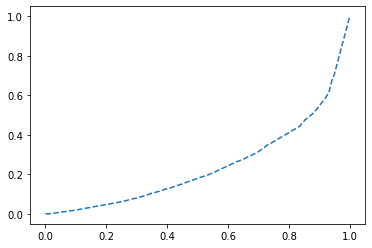

In [75]:
#https://www.bing.com/videos/search?q=how+to+vizualize+multiple+model+accuracy+in+python&docid=603517457156868187&mid=9BCB5D262304A6386A3F9BCB5D262304A6386A3F&view=detail&FORM=VIRE
#binarize the y_values
y_test_binarized = label_binarize(y_test, classes = np.unique(y_test))
# roc curve for classes
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()
#classes = np.unique(y_test)
n_class = classes.shape[0]
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    #plotting
    plt.plot(fpr[i], tpr[i], linestyle= '--',label='%s vs Rest (AUC=%0,2f)')

plt.plot([0,1],[0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


In [63]:
cm = confusion_matrix(y_test, rf_y_pred)
cm

array([[    0,  3441],
       [    0, 84012]], dtype=int64)

<Figure size 288x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 15.0, 'Predicted')

Text(15.0, 0.5, 'Truth')

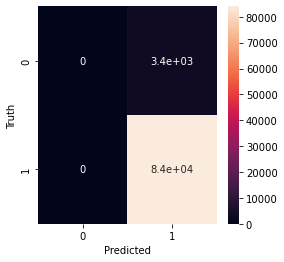

In [64]:
%matplotlib inline
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Support Vector Machine(SVM) from SKLearn

In [78]:
from sklearn import svm
'''
Kernel coefficient for ''rbf','poly' and 'sigmoid'.
current default is 'auto' which uses (1/n_features),
if ``gamma='scale'`` is passes then it uses 1/(n_features*X.var())
as value of gamma.
'''
classifier = svm.SVC(kernel='rbf', gamma='auto' , C=1.5)

"\nKernel coefficient for ''rbf','poly' and 'sigmoid'.\ncurrent default is 'auto' which uses (1/n_features),\nif ``gamma='scale'`` is passes then it uses 1/(n_features*X.var())\nas value of gamma.\n"

In [79]:
classifier.fit(X_train, y_train)
svm_y_pred = classifier.predict(X_test)

SVC(C=1.5, gamma='auto')

In [102]:
svc_per =classification_report(y_test, svm_y_pred)
print(svc_per)
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      3441
         2.0       0.96      1.00      0.98     84012

    accuracy                           0.96     87453
   macro avg       0.48      0.50      0.49     87453
weighted avg       0.92      0.96      0.94     87453



In [106]:
print("Random forest Algorithm")
print(rf_per)
print("Performance of Support Vector Machine")

print(svc_per)

Random forest Algorithm
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      3441
         2.0       0.96      1.00      0.98     84012

    accuracy                           0.96     87453
   macro avg       0.48      0.50      0.49     87453
weighted avg       0.92      0.96      0.94     87453

Performance of Support Vector Machine
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      3441
         2.0       0.96      1.00      0.98     84012

    accuracy                           0.96     87453
   macro avg       0.48      0.50      0.49     87453
weighted avg       0.92      0.96      0.94     87453



### 96% of accuracy has been achieved by three algorithms Logistics, Random forest and SVM although Naive Bayes able to give 86% of accuracy.

### Accuracy is used for balanced datasets while AUC is well-suited for imbalanced datasets.

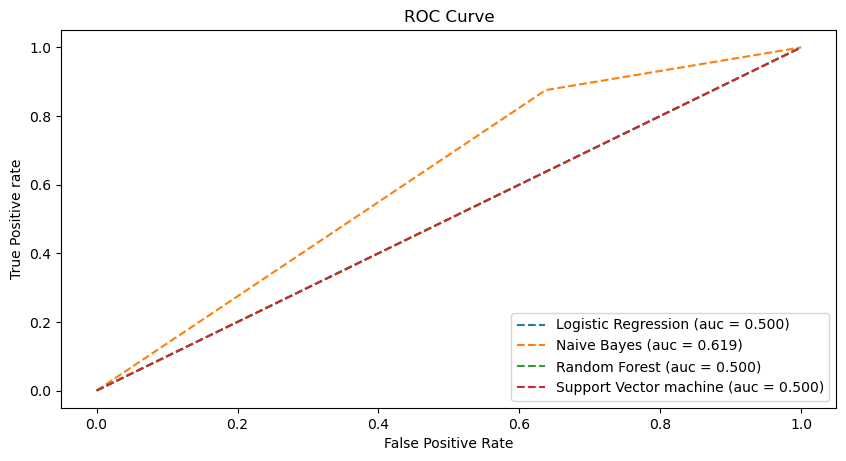

In [77]:
y_test_bi = label_binarize(y_test, classes = np.unique(y_test))

log_fpr, log_tpr, thresold = roc_curve(y_test_bi, log_y_pred)
log_auc = auc(log_fpr, log_tpr)

nb_fpr, nb_tpr, thresold = roc_curve(y_test_bi, nb_y_pred)
nb_auc = auc(nb_fpr, nb_tpr)

rf_fpr, rf_tpr, thresold = roc_curve(y_test_bi, rf_y_pred)
rf_auc = auc(rf_fpr, rf_tpr)

svm_fpr, svm_tpr, thresold = roc_curve(y_test_bi, svm_y_pred)
svm_auc = auc(svm_fpr, svm_tpr)

plt.figure(figsize = (10, 5), dpi = 100)
plt.plot(log_fpr, log_tpr, linestyle= '--', label='Logistic Regression (auc = %0.3f)' % log_auc)
plt.plot(nb_fpr, nb_tpr, linestyle= '--', label='Naive Bayes (auc = %0.3f)' % nb_auc)
plt.plot(rf_fpr, rf_tpr, linestyle= '--', label='Random Forest (auc = %0.3f)' % rf_auc)
plt.plot(svm_fpr, svm_tpr, linestyle= '--', label='Support Vector machine (auc = %0.3f)' % svm_auc)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show();